# Metehan Ayhan - Traffic Sign Recognition Project

Bu projenin amacı, Almanya'daki trafik işaretlerini tanıyan bir derin öğrenme modeli geliştirmektir. Kaggle'daki German Traffic Sign Dataset kullanılarak, çeşitli trafik işaretlerine ait görüntülerle model eğitilmiştir. Projenin hedefi, kullanıcıların trafik işareti görüntülerini yükleyerek trafik işaretlerini tanıyabilmelerini sağlamaktır.

### Import Packet

In [6]:
#!pip install tensorflow

In [8]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization
from sklearn.model_selection import train_test_split

### Import Data

In [11]:
train_csv=pd.read_csv('Train.csv')
test_csv=pd.read_csv('Test.csv')

In [15]:
train = 'Train'
test = 'Test'

### Tagging images

In [18]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right', 37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }    

In [20]:
path = train
labels = []
images = []

for c in classes:
  c_path = os.path.join(path,str(c))
  for img in os.listdir(c_path):
    images.append(os.path.join(c_path,img))
    labels.append(c)

In [22]:
df = pd.DataFrame()
df['images'] = images
df['labels'] = labels
df['class'] = df['labels'].map(classes)

In [24]:
df.sample(5)

,images,labels,class
36988,Train\38\00038_00032_00029.png,38,Keep right
29189,Train\25\00025_00023_00029.png,25,Road work
22671,Train\14\00014_00013_00021.png,14,Stop
15362,Train\10\00010_00023_00002.png,10,No passing veh over 3.5 tons
21068,Train\13\00013_00032_00008.png,13,Yield


### Normalization

In [27]:
x = []
for img in df['images']:
  img = cv2.imread(img)
  img = cv2.resize(img, (32,32))
  img = img / 255
  x.append(img)

In [28]:
#sayı dizisine dönüştürelim
x = np.array(x)
y = df['labels']

### CNN - Convolutional Neural Networks

In [29]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42)

In [32]:
model=Sequential()
model.add(Input(shape=(32,32,3)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192,459 (751.79 KB)

 Trainable params: 192,011 (750.04 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [33]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30)

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6188 - loss: 1.3173 - val_accuracy: 0.9642 - val_loss: 0.1057
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9683 - loss: 0.1042 - val_accuracy: 0.9736 - val_loss: 0.0843
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9794 - loss: 0.0714 - val_accuracy: 0.9697 - val_loss: 0.1047
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9837 - loss: 0.0559 - val_accuracy: 0.9653 - val_loss: 0.1193
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9891 - loss: 0.0405 - val_accuracy: 0.9805 - val_loss: 0.0728
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9836 - loss: 0.0607 - val_accuracy: 0.9782 - val_loss: 0.0791
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9907 - loss: 0.0347 - val_accuracy: 0.9783 - val_loss: 0.0883
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9905 - loss: 0.0343 - val

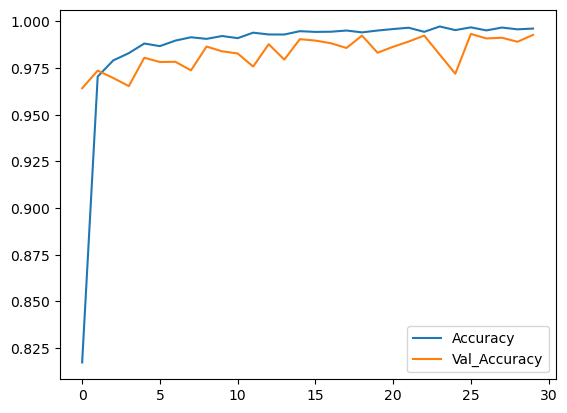

In [34]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend();

In [35]:
pred = model.predict(x_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Save Model

In [37]:
model.save('model.h5')